# Price Range Analysis 

In [1]:
import pandas as pd
df = pd.read_csv('Dataset .csv')

## Find the most common price range

In [2]:
most_common_price_range = df['Price range'].mode()[0]
print(f"\nMost common price range among all restaurants: {most_common_price_range}")


Most common price range among all restaurants: 1


## Use only rated restaurants

In [3]:
rated_df = df[df['Aggregate rating'] > 0]

# Group by price range and calculate average rating
avg_rating_per_price = rated_df.groupby('Price range')['Aggregate rating'].mean()
print("\nAverage rating for each price range:")
display(avg_rating_per_price)


Average rating for each price range:


Price range
1    3.238885
2    3.377167
3    3.777276
4    3.890957
Name: Aggregate rating, dtype: float64

## Identify the color representing the highest average rating

In [4]:
# Find the price range with highest average rating
highest_avg_rating_price_range = avg_rating_per_price.idxmax()
print(f"\nPrice range with the highest average rating: {highest_avg_rating_price_range}")

# Find the most common rating color in that price range
# (if multiple restaurants have different colors)
color_in_highest = rated_df[rated_df['Price range'] == highest_avg_rating_price_range]['Rating color'].mode()[0]
print(f"Color representing the highest average rating among different price ranges: {color_in_highest}")


Price range with the highest average rating: 4
Color representing the highest average rating among different price ranges: Yellow


## Plot

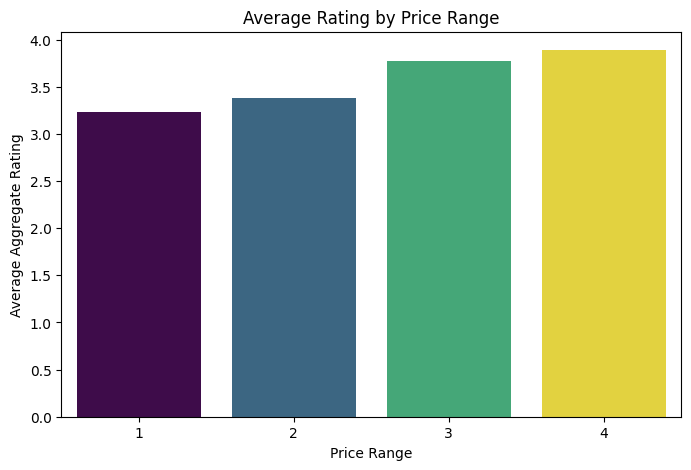

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(x=avg_rating_per_price.index, 
            y=avg_rating_per_price.values, 
            hue=avg_rating_per_price.index, 
            palette='viridis', 
            legend=False)
plt.title('Average Rating by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Aggregate Rating')
plt.show()